In [104]:
import pandas as pd
import numpy as np
from scipy.interpolate import *
import matplotlib.pyplot as plt

data = pd.read_csv('1.txt', encoding='utf-8', delimiter='\t', header=None)
timestamps = np.array(data.iloc[:, 0])
centers = np.array(data.iloc[:, 1])
heights = np.array(data.iloc[:, 2])
labels_orig = np.array(data.iloc[:, 3])
_, idx = np.unique(labels_orig, return_index=True)
labels_unique = labels_orig[np.sort(idx)]

action_start = []
action_end = []

for label in labels_unique:
    action_start.append(timestamps[np.where(labels_orig == label)[0][0]])
    action_end.append(timestamps[np.where(labels_orig == label)[0][-1]])

action_start = np.array(action_start)
action_end = np.array(action_end)

labels_unique

array(['D', 'C', 'T', 'S'], dtype=object)

In [107]:
action_period = action_end - action_start

In [152]:
category = 3
action = labels_unique[category]

section_timestamps = []
section_centers = []
section_heights = []

for idx, t in enumerate(timestamps):
    if action_start[category] <= t <= action_end[category]:
        section_timestamps.append(timestamps[idx])
        section_centers.append(centers[idx])
        section_heights.append(heights[idx])

section_timestamps_new = np.arange(section_timestamps[0], section_timestamps[-1], 1)
actions = np.tile(action, len(section_timestamps_new))

len(section_timestamps_new)

145

In [153]:
interp_c = Akima1DInterpolator(section_timestamps, section_centers)
interp_h = Akima1DInterpolator(section_timestamps, section_heights)

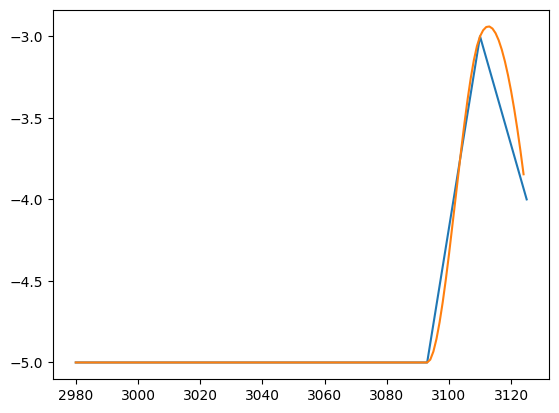

In [154]:
# plt.plot(section_timestamps, section_centers)
# plt.plot(section_timestamps_new, interp_c(section_timestamps_new))

plt.plot(section_timestamps, section_heights)
plt.plot(section_timestamps_new, interp_h(section_timestamps_new))

In [133]:
output_timestamps = []
output_centers = []
output_heights = []
output_actions = []

In [155]:
output_timestamps.extend(section_timestamps_new.tolist())
output_centers.extend(interp_c(section_timestamps_new).tolist())
output_heights.extend(interp_h(section_timestamps_new).tolist())
output_actions.extend(actions.tolist())

In [156]:
output = pd.DataFrame(np.row_stack((output_timestamps,
                                    output_centers,
                                    output_heights,
                                    output_actions), dtype=object).T, columns=['Timestamp', 'Center', 'Height', 'Action'])

output

,Timestamp,Center,Height,Action
0,489.0,65.0,-5.0,D
1,490.0,64.900794,-4.511243,D
2,491.0,64.84127,-4.058201,D
3,492.0,64.821429,-3.660714,D
4,493.0,64.84127,-3.338624,D
...,...,...,...,...
438,3120.0,108.127927,-3.33687,S
439,3121.0,106.667943,-3.447091,S
440,3122.0,105.113618,-3.569057,S
441,3123.0,103.476491,-3.702226,S


In [157]:
np.savetxt('2.txt', output.values, fmt='%s', delimiter='\t')